In [1]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt
from helper import batches
from sklearn.model_selection import train_test_split

tf.compat.v1.disable_eager_execution()

In [2]:
import os
path = os.getcwd() + "\mnist.npz"
print(path)


C:\Users\my pc\Desktop\courses\advanced_self_driving_car\deep learning\intro_to_tensorflow\mini_batch\mnist.npz


In [3]:
(train_feature, train_label), (test_feature, test_label) = mnist.load_data(path=path)

learn_rate = 0.01
n_inputs = 784
n_classes = 10
batch_size=32


print(f'training features :{train_feature.shape}')
print(f'training label :{train_label.shape}')
print(f'test features :{test_feature.shape}')
print(f'test label :{test_label.shape}')

training features :(60000, 28, 28)
training label :(60000,)
test features :(10000, 28, 28)
test label :(10000,)


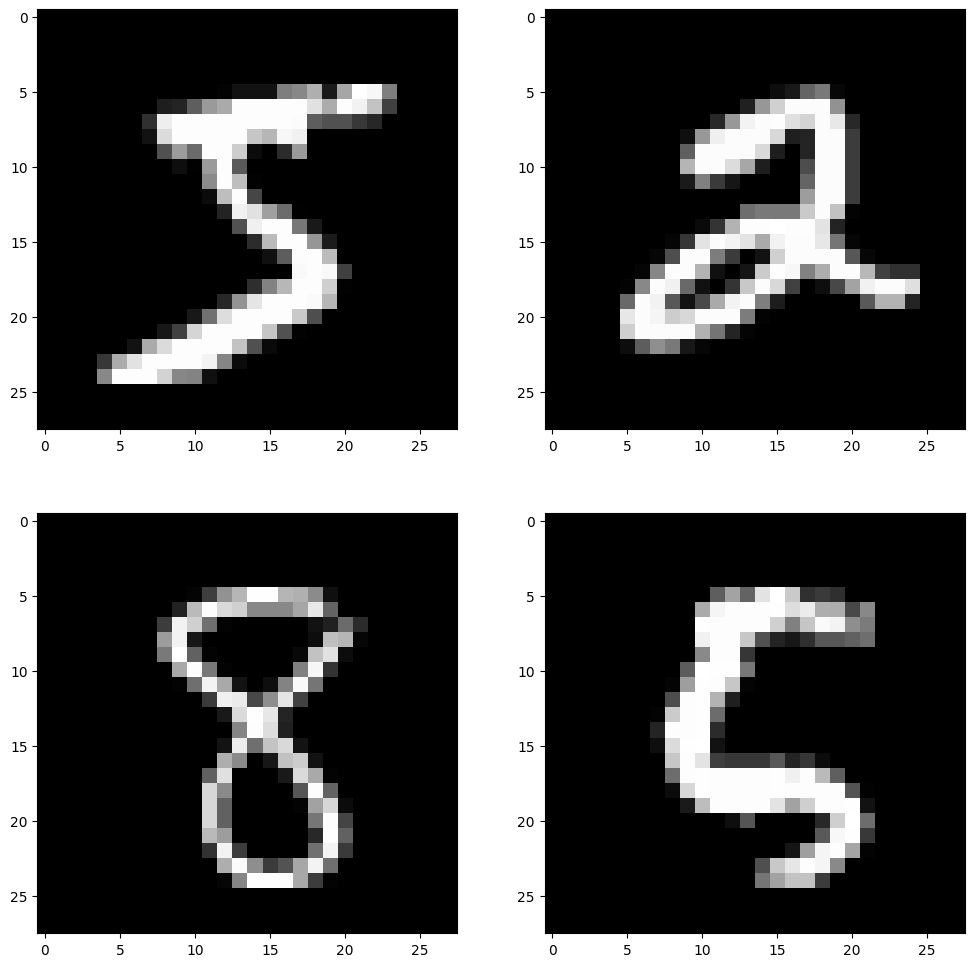

In [4]:
f, axs = plt.subplots(2,2, figsize=(12,12))
axs[0,0].imshow(train_feature[0], cmap='gray')
axs[0,1].imshow(train_feature[5], cmap='gray')
axs[1,0].imshow(train_feature[144], cmap='gray')
axs[1,1].imshow(train_feature[2000], cmap='gray')

In [5]:
train_features = []
test_features = []

for image in train_feature:
    train_features.append(np.array(image, dtype=np.float32).flatten())

for image in test_feature:
    test_features.append(np.array(image, dtype=np.float32).flatten())


train_features = np.array(train_features) / 255.0
test_features = np.array(test_features) / 255.0




train_labels = to_categorical(train_label.astype(np.float32), 10)
test_labels = to_categorical(test_label.astype(np.float32), 10)

train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features, 
    train_labels, 
    test_size=0.1,
    random_state=42)

features = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])
labels = tf.compat.v1.placeholder(tf.float32, [None, n_classes])
weights = tf.compat.v1.Variable(tf.compat.v1.random_normal([n_inputs, n_classes]))
bias = tf.compat.v1.Variable(tf.compat.v1.random_normal([n_classes]))
learning_rate = tf.compat.v1.placeholder(tf.float32)



#logit = xW + b
logits = tf.add(tf.matmul(features, weights), bias)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.compat.v1.global_variables_initializer()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print(valid_features.shape)
print(valid_labels.shape)

(54000, 784)
(54000, 10)
(10000, 784)
(10000, 10)
(6000, 784)
(6000, 10)


In [7]:
def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        loss,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

In [12]:
epochs = 10
batch_size = 32
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for i_ep in range(epochs):
        for batch_feature, batch_label in batches(batch_size, train_features,train_labels):
            feed_dict_train = {features:batch_feature, labels:batch_label, learning_rate:learn_rate}
            sess.run(optimizer, feed_dict=feed_dict_train)
        print_epoch_stats(i_ep, sess, train_features, train_labels)
    test_accuracy = sess.run(accuracy, feed_dict={features:test_features, labels:test_labels})
    

Epoch: 0    - Cost: 2.7      Valid Accuracy: 0.554
Epoch: 1    - Cost: 1.79     Valid Accuracy: 0.668
Epoch: 2    - Cost: 1.44     Valid Accuracy: 0.724
Epoch: 3    - Cost: 1.25     Valid Accuracy: 0.758
Epoch: 4    - Cost: 1.12     Valid Accuracy: 0.776
Epoch: 5    - Cost: 1.03     Valid Accuracy: 0.793
Epoch: 6    - Cost: 0.961    Valid Accuracy: 0.807
Epoch: 7    - Cost: 0.906    Valid Accuracy: 0.814
Epoch: 8    - Cost: 0.861    Valid Accuracy: 0.821
Epoch: 9    - Cost: 0.824    Valid Accuracy: 0.829


In [13]:
print('Test Accuracy: {}'.format(test_accuracy))


Test Accuracy: 0.8334000110626221


In [11]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

tf.compat.v1.enable_eager_execution()

# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=path)
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

print(y_train.shape)
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate)

# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

# Test model on validation set.
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

ValueError: tf.enable_eager_execution must be called at program startup.